# Lab 2 - Hyperparameter Tuning

You will be graded based on
- Originality of your implementation
- Result of your implementation
- In-class Q/A to test your understanding

Note: **DO NOT** add comments in your code

C:\Users\Thanh Tran\AppData\Local\Temp\ipykernel_4640\201540015.py:25: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


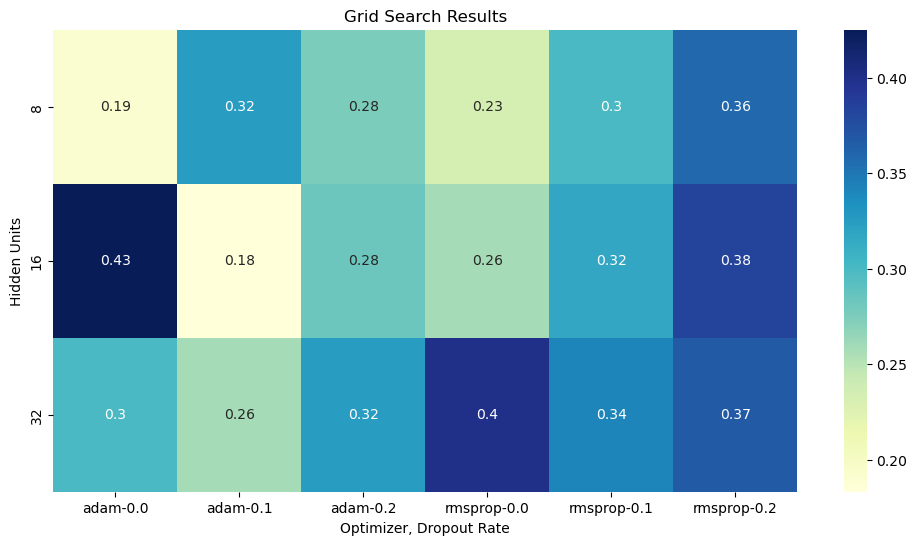

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris # Read more about IRIS Dataset here https://www.kaggle.com/code/kostasmar/exploring-the-iris-data-set-scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import pandas as pd
iris = load_iris() 
X = iris.data
y = iris.target
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def create_model(optimizer, hidden_units, dropout_rate):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=4, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn=create_model, verbose=0)
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'hidden_units': [8, 16, 32],
    'dropout_rate': [0.0, 0.1, 0.2],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
results = pd.DataFrame(grid_search.cv_results_)
mean_test_scores = results.pivot_table(values='mean_test_score',
                                       index='param_hidden_units',
                                       columns=['param_optimizer', 'param_dropout_rate'])
plt.figure(figsize=(12, 6))
sns.heatmap(mean_test_scores, annot=True, cmap='YlGnBu')
plt.title("Grid Search Results")
plt.xlabel("Optimizer, Dropout Rate")
plt.ylabel("Hidden Units")
plt.show()

## Question 1
Import **ONE** Dataset from: 
- Kaggle https://www.kaggle.com/datasets
- SKLearn https://scikit-learn.org/stable/datasets.html
- HuggingFace https://huggingface.co/docs/datasets/index
- ...

Then implement **ONE** Neural Network
- Hugging Face https://huggingface.co
- Pytorch https://pytorch.org/vision/stable/models.html
- ...

In [2]:
# Implement Question 1 here


## Question 2
Implement **ONE** of these Tuners
- Bayesian Optimisation
- Evolutionary Algorithms
- Gradient-Based Optimisation
- Keras Tuner
- Population-based Optimisation
- ParamILS
- Random Search
- ...

Using at least **THREE** of these hyperparameters
- Learning Rate
- Loss Function
- Layer Size
- Layer Params
- Weight Initialization
- Weight of Regularization
- Model Depth
- Optimizer
- Optimizer Params
- Batch Size
- ...

In [3]:
# Implement Question 2 here

## Question 3
Visualize the result using **ONE** library:
- Seaborn https://seaborn.pydata.org/examples/index.html
- ...

In [4]:
# Implement Question 3 here